<a href="https://colab.research.google.com/github/VielF/CodesVHDL/blob/main/Gerar_Imagem_Binario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Exemplo para escrita e leitura de imagens em binário

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Abrindo a imagem

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
!pip install bitstring
from bitstring import BitStream, BitArray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#abria a imagem
img = cv2.imread('lena.jpg',0)
#cv2_imshow(img)

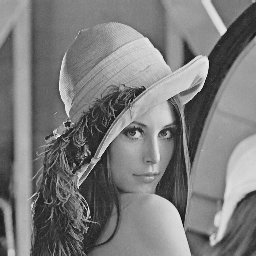

(256, 256)


In [10]:
#mostrando a imagem 
cv2_imshow(img)
print(img.shape)

## Criando um arquivo e escrevendo os pixels em formato binário

In [11]:
img_bin = open('img_bin.txt', 'w')

In [12]:
# nxm da imagem
n, m = img.shape

for i in range(n):
  for j in range(m):
    bit = BitArray(uint=img[i][j], length=8)
    in_bits = bit.bin+'\n'
    img_bin.write(in_bits)

img_bin.close()

## Abrindo um arquivo com pixels em binário, lendo-os e plotando a imagem

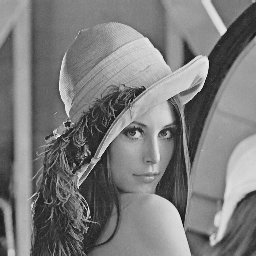

In [14]:
read_image = open('img_bin.txt', 'r')
count_line = 0
count_row = 0
image_recupered = np.zeros((n, m),dtype=np.int32)  #cuidado, nxm deve ter o tamanho da imagem, ex: 256x256

for line in read_image:
    if(count_row == (n)):
      count_row = 0
      count_line +=1
    if(count_line < m):
      image_recupered[count_line][count_row] = int(line.strip(), 2)
    count_row +=1

read_image.close()
cv2_imshow(image_recupered)